In [63]:
from sklearn import datasets
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()

In [64]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [65]:
faces.images.shape

(400, 64, 64)

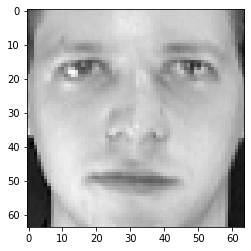

In [66]:
img = faces.images[0]
plt.imshow(img, cmap='gray')

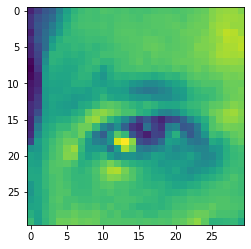

In [67]:
plt.imshow(img[:30,:30])

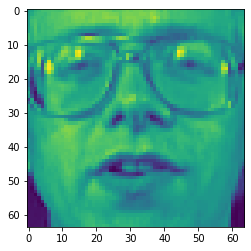

In [68]:
plt.imshow(faces.images[10])

In [69]:
def visual_multi(idx_start,n=10):
    n_plot = n
    fig=plt.figure(figsize=[12,8])
    for j in range(n_plot):
        plt.subplot(5,10,j+1)
        plt.imshow(faces.images[
            idx_start+j
        ], cmap='gray')
        plt.title(faces.target[
            idx_start+j
        ])
        plt.axis('off')
plt.show()

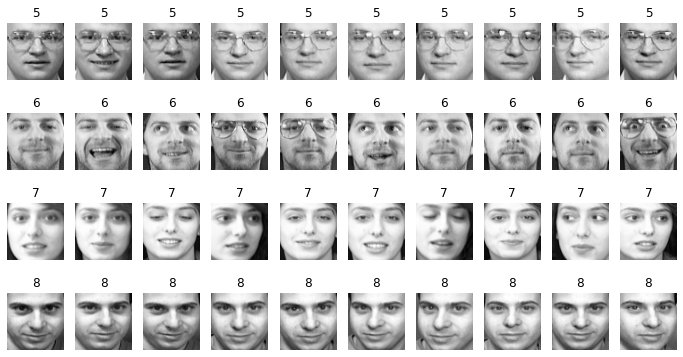

In [70]:
visual_multi(50,40)
#plt.savefig('faces.jpg')

In [71]:
n_samples=60
Xn = faces.images[:n_samples] # 6 people # each 10 images
Xn.shape

(60, 64, 64)

In [72]:
X = Xn.reshape(n_samples, -1)
X.shape,  X[:1].shape

((60, 4096), (1, 4096))

In [73]:
y = faces.target[:n_samples]
y # 6 people

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=.25, random_state=2)
X_train.shape, X_test.shape

((45, 4096), (15, 4096))

In [75]:
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

In [76]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 4, 5, 2, 4, 0, 2, 5, 3, 0, 3, 4, 2, 0])

In [77]:
y_test

array([3, 0, 4, 5, 2, 4, 3, 2, 4, 3, 0, 3, 4, 2, 0])

## See Score

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('Accuracy score : {}'. format(accuracy_score(y_test, y_pred).round(4)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy score : 0.8667
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      0.75      0.86         4
           5       0.50      1.00      0.67         1

    accuracy                           0.87        15
   macro avg       0.85      0.90      0.85        15
weighted avg       0.92      0.87      0.87        15

[[3 0 0 0 0]
 [0 3 0 0 0]
 [1 0 3 0 0]
 [0 0 0 3 1]
 [0 0 0 0 1]]


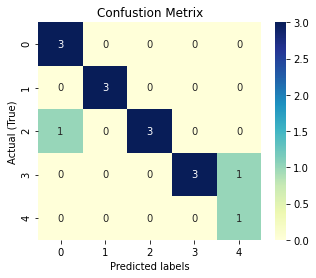

In [79]:
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4
plt.rcParams.update({'font.size':10})

sns.heatmap(cm, annot=True, ax=ax, cmap='YlGnBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)')
ax.set_title('Confustion Metrix')
plt.show()

## Compare right & wrong prediction

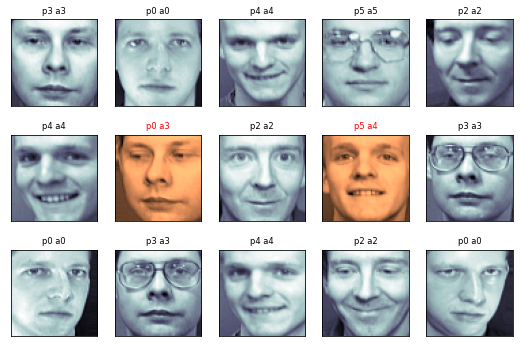

In [80]:
fig = plt.figure(figsize=(9,6))

default_shape = faces.images[0].shape
for i in range(len(y_pred)):
    ax = fig.add_subplot(3,5, i+1, xticks=[], yticks=[], ) # 3 rows, 5 cols
    is_match = y_pred[i]==y_test[i] 
    
    cmap = plt.cm.copper if not(is_match) else 'bone'
    ax.imshow(X_test[i].reshape(default_shape), cmap=cmap)
    
    color = ('black' if is_match else 'red')
    title = 'p{} a{}'.format(y_pred[i], y_test[i])
    ax.set_title(title, fontsize='small', color=color)
    
plt.show()